Imports

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from skimage.io import imread
from sklearn.cluster import KMeans

# Some fish segmentation

## Super Pixels

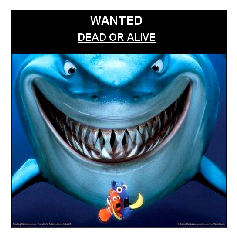

In [5]:
img=imread('fish.jpg')
imgplot = plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

Felzenszwalb number of segments: 446
SLIC number of segments: 196
Quickshift number of segments: 1156


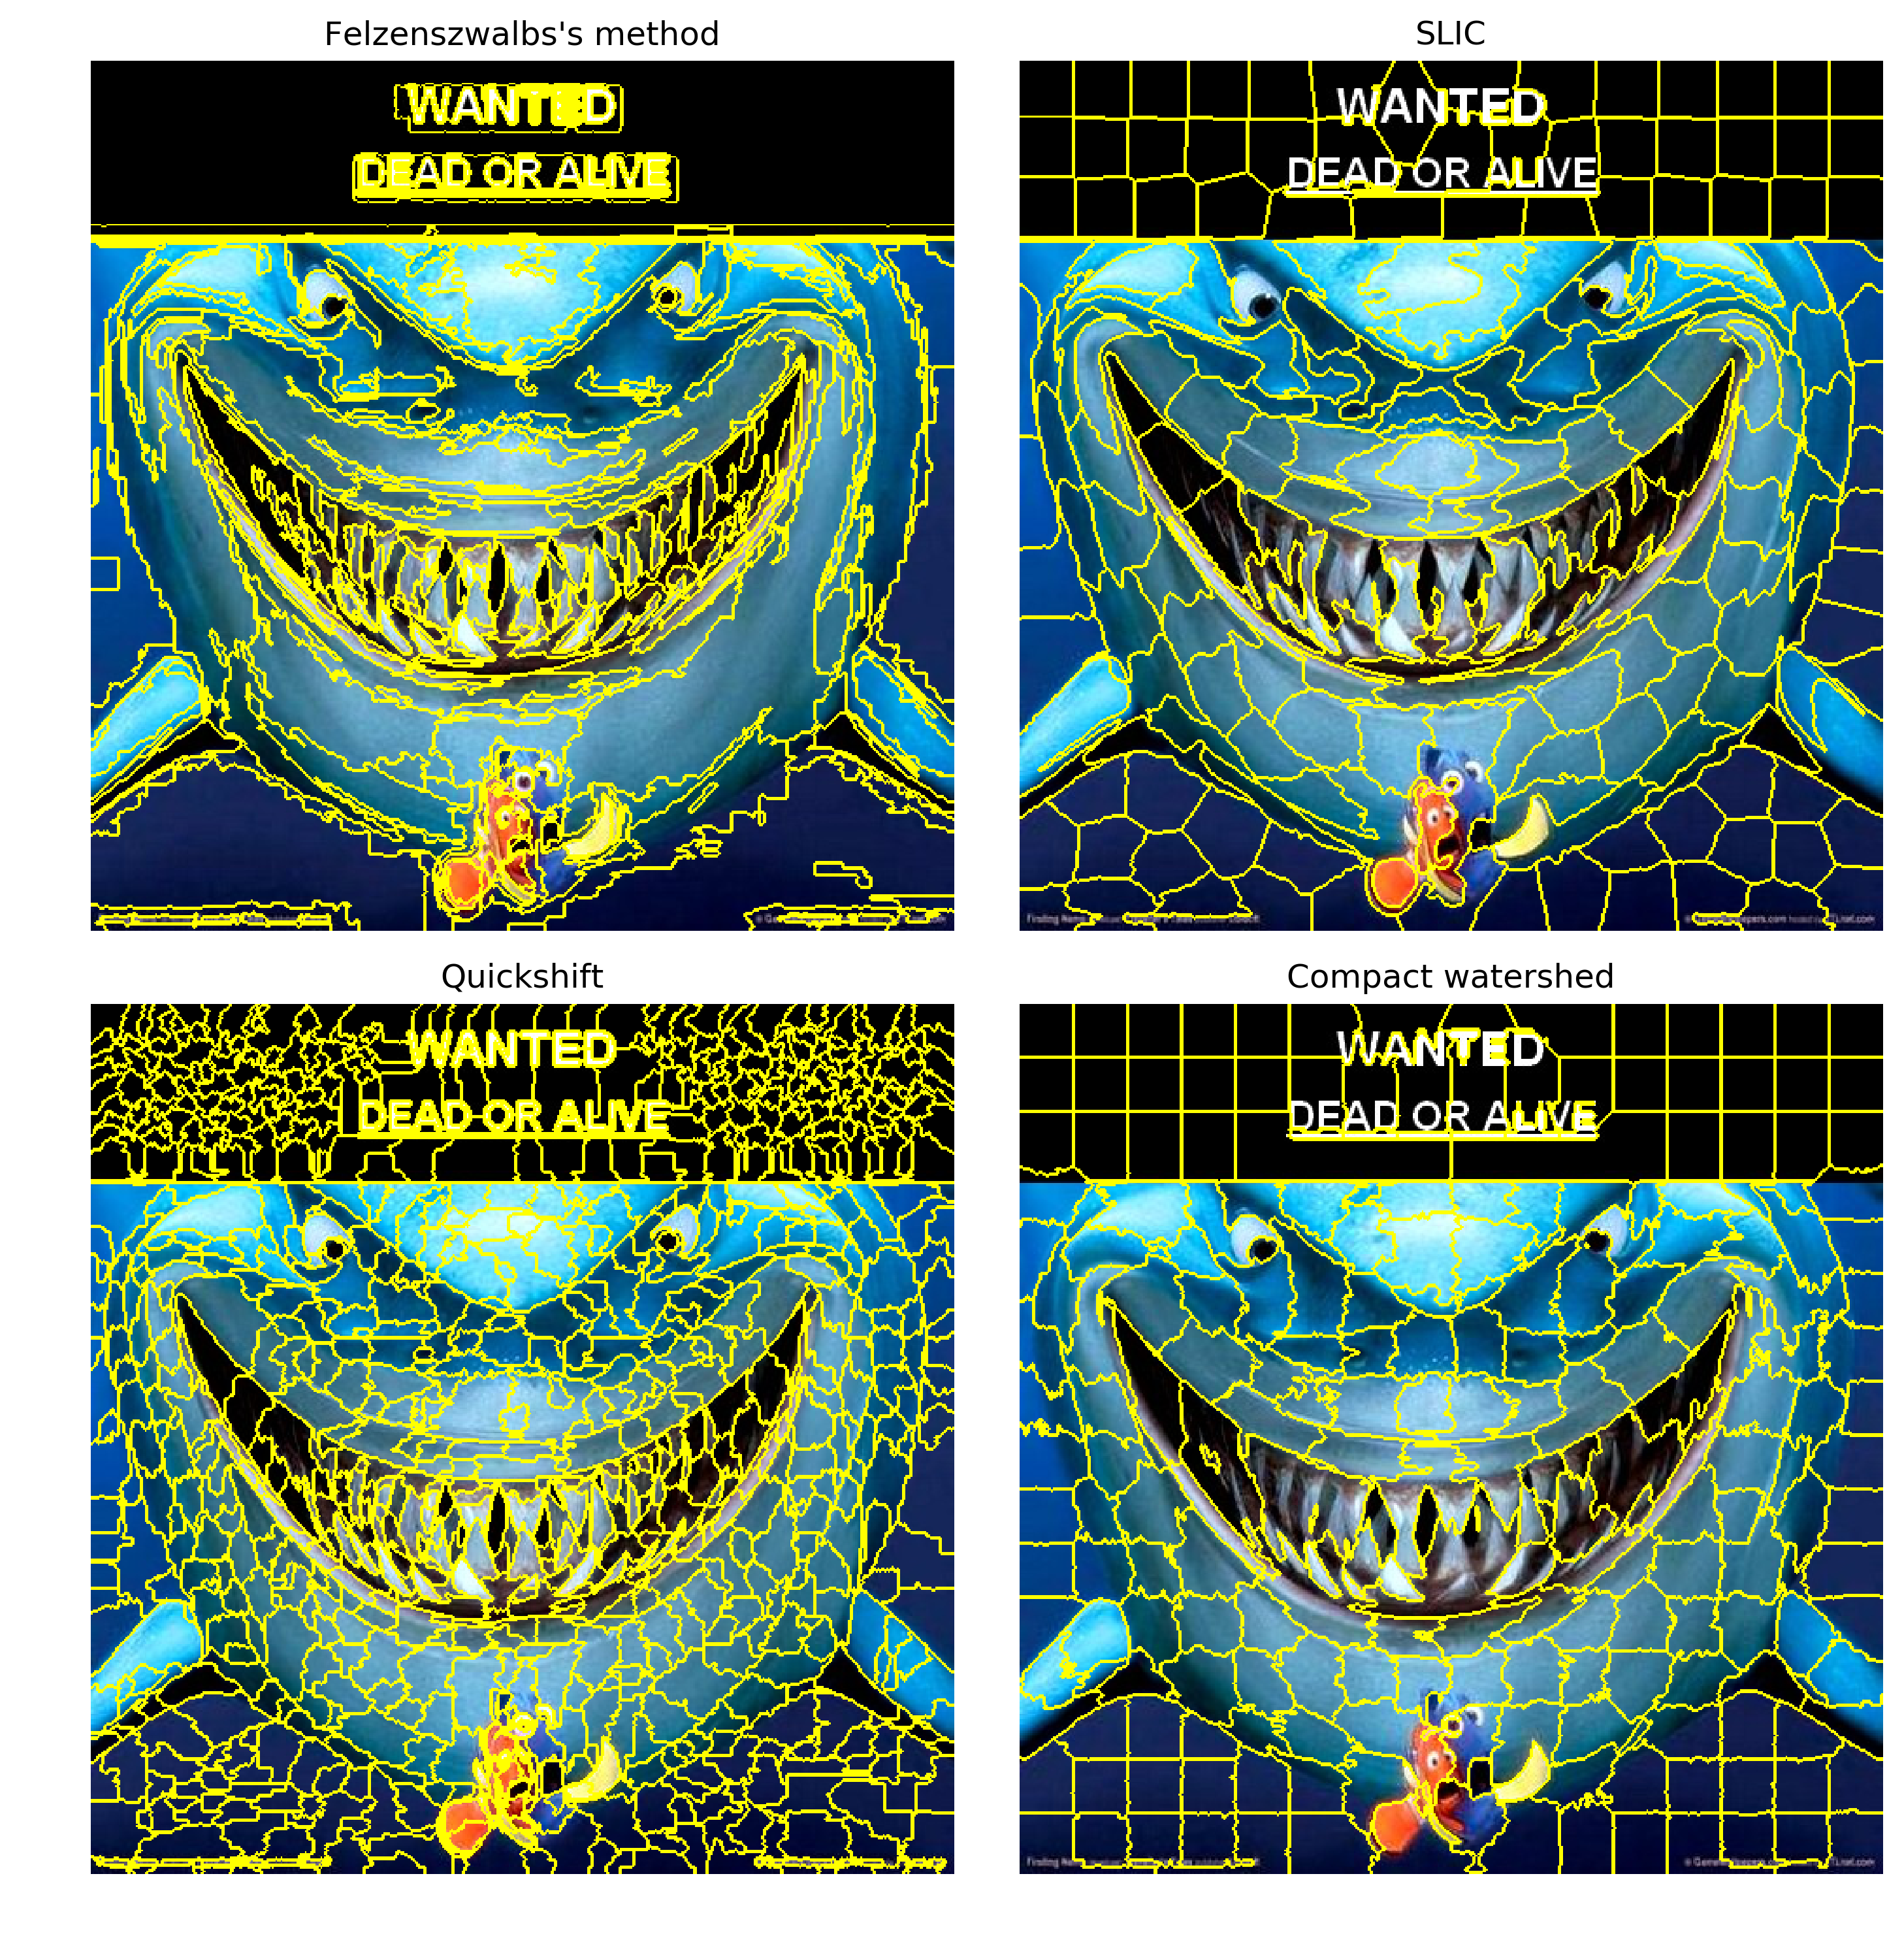

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img=imread('fish.jpg')
segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

fig.set_dpi(300)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

**Felzenszwalb’s segmentation**
- *scale* : influences the segment size. The actual size and number of segments can vary greatly, depending on local contrast.

**Quickshift image segmentation**
- *sigma* : controls the scale of the local density approximation
- *max_dist* : selects a level in the hierarchical segmentation that is produced
- *ratio* : trade-off between distance in color-space and distance in image-space

**SLIC - K-Means based image segmentation**
- *compactness* : trades off color-similarity and proximity, as in the case of Quickshift
- *n_segments* : chooses the number of centers for kmeans

**Compact watershed segmentation of gradient images**
- *compactness* : see SLIC

## K-means